# Question 1: Baby Weights
Do baby boys weight more than baby firls on average? 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
bmx = pd.read_sas('BMX_I.XPT')
demo = pd.read_sas('DEMO_I.XPT')
#combine two tables together
finalData = pd.merge(left = demo,right = bmx,on = 'SEQN')    #what if there are NaNs? 

1. Calculate and display the mean weight of baby boys for each month, from month 0 to 12.
You’ll produce 13 values, one for each month

In [2]:
boyWeightMean=[]
girlWeightMean=[]
for i in range(13): #This looks very redundant, you may come out with something more elegant
    if(i!=0):
        tempBoyWeight = finalData.loc[(finalData.loc[:,'RIAGENDR']==1)&(finalData.loc[:,'RIDAGEMN']==i)]
        #print(type(tempBoyWeight))
        tempGirlWeight = finalData.loc[(finalData.loc[:,'RIAGENDR']==2)&(finalData.loc[:,'RIDAGEMN']==i)]
        #print(type(tempGirlWeight))
        boyWeightMean.append(tempBoyWeight.loc[:,'BMXWT'].mean())
        #print(type(tempBoyWeight.loc[:,'BMXWT']))
        girlWeightMean.append(tempGirlWeight.loc[:,'BMXWT'].mean())
    else:
        tempBoyWeight = finalData.loc[(finalData.loc[:,'RIAGENDR']==1)&(finalData.loc[:,'RIDAGEMN']<i+1)]
        tempGirlWeight = finalData.loc[(finalData.loc[:,'RIAGENDR']==2)&(finalData.loc[:,'RIDAGEMN']<i+1)]
        boyWeightMean.append(tempBoyWeight.loc[:,'BMXWT'].mean())
        girlWeightMean.append(tempGirlWeight.loc[:,'BMXWT'].mean())
        
month = np.arange(13)
boyWeightMean = np.array(boyWeightMean)
girlWeightMean = np.array(girlWeightMean)



 Calculate and display the mean weight of baby boys for each month, from month 0 to 12.
You’ll produce 13 values, one for each month.

In [3]:
print('Average weight of boys:\n')
print(boyWeightMean)
boyDf = pd.DataFrame({'weight':boyWeightMean,'age':month})
boyDf

Average weight of boys:

[ 4.79444444  5.79166667  6.66111111  7.          7.795       8.525
  8.26363636  9.06111111  9.32222222 10.09375    10.36428571  9.96363636
 10.52307692]


,age,weight
0,0,4.794444
1,1,5.791667
2,2,6.661111
3,3,7.000000
4,4,7.795000
5,5,8.525000
6,6,8.263636
7,7,9.061111
8,8,9.322222
9,9,10.093750


 Calculate and display the mean weight of baby girls for each month, from month 0 to 12

In [4]:
print('Average weight of girls:\n')
print(girlWeightMean)
girlDf = pd.DataFrame({'weight':girlWeightMean,'age':month})
girlDf

Average weight of girls:

[4.50833333 5.45714286 5.7125     6.55384615 7.05294118 7.64705882
 8.00526316 8.19090909 8.3037037  9.24375    9.06666667 9.1
 9.75714286]


,age,weight
0,0,4.508333
1,1,5.457143
2,2,5.712500
3,3,6.553846
4,4,7.052941
5,5,7.647059
6,6,8.005263
7,7,8.190909
8,8,8.303704
9,9,9.243750


 Calculate and display the difference between the mean weights of boys and girls for each
month.

In [5]:
print('Average weight difference (boy-girls):\n')
print(boyWeightMean-girlWeightMean)

Average weight difference (boy-girls):

[0.28611111 0.33452381 0.94861111 0.44615385 0.74205882 0.87794118
 0.25837321 0.87020202 1.01851852 0.85       1.29761905 0.86363636
 0.76593407]


Make a line plot showing two lines: one for boys’ mean weights months 0-12, and one
for girls’ mean weights 0-12 (in a different color). The month will go on the x-axis, and the mean
weight will go on the y-axis.


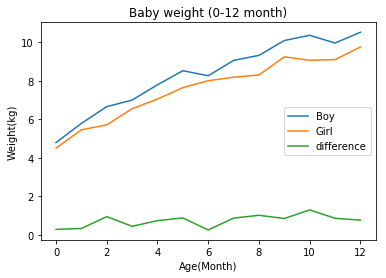

In [6]:
l1,=plt.plot(month,boyWeightMean,label='Boy')
l2,=plt.plot(month,girlWeightMean,label='Girl')
l3,=plt.plot(month,boyWeightMean-girlWeightMean,label='difference')
plt.legend(loc='right')
plt.xlabel('Age(Month)')
plt.ylabel('Weight(kg)')
plt.title('Baby weight (0-12 month)')
plt.show()

 (with seaborn) Make a scatterplot with linear regression lines for the baby boys’
relationship between age and wt, and the baby girls’ relationship between age and wt.

Text(0.5,1,'Body Weight of Male Baby')

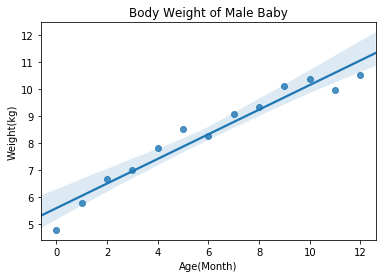

In [7]:
tempPlot = sns.regplot(x=month,y=boyWeightMean)
tempPlot.set_xlabel('Age(Month)')
tempPlot.set_ylabel('Weight(kg)')
tempPlot.set_title('Body Weight of Male Baby')


Text(0.5,1,'Body Weight of Female Baby')

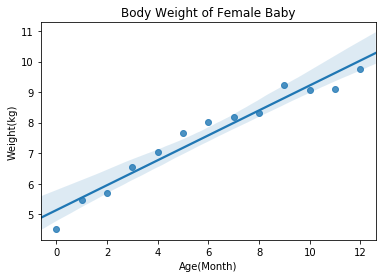

In [8]:
tempPlot = sns.regplot(x=month,y=girlWeightMean)
tempPlot.set_xlabel('Age(Month)')
tempPlot.set_ylabel('Weight(kg)')
tempPlot.set_title('Body Weight of Female Baby')